The input are either actual training data or the outputs of neurons from the previous layer in the neural network.
The values for weights and biases are what get “trained,” and they are what make a model actually work
At the moment, we’re modeling a single neuron with three inputs. Since we’re modeling a single neuron, we only have one bias, as there’s just one bias value per neuron.

In [1]:
inputs = [1, 2, 3]
weights = [0.2, 0.8, -0.5]
bias = 2

This neuron sums each input multiplied by that input’s weight, then adds the bias. All the neuron does is take the fractions of inputs, where these fractions (weights) are the adjustable parameters,
and adds another adjustable parameter — the bias — then outputs the result. 

![Single neuron](./img/single.png)

In [2]:
output = inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + bias
output

2.3

Layer of neurons 

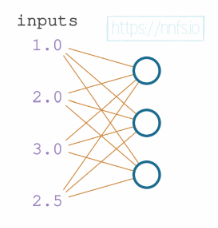

In [5]:
inputs = [1.0, 2.0, 3.0, 2.5]

weights = [
            [0.2, 0.8, -0.5, 1],
            [0.5, -0.91, 0.26, -0.5],
            [-0.26, -0.27, 0.17, 0.87]
          ]

biases = [2, 3, 0.5]

layer_outputs = []

for neuron_weights, neuron_bias in zip(weights, biases):
    neuron_output = 0
    for n_input, weight in zip(inputs, neuron_weights):
        neuron_output += n_input*weight
    neuron_output += neuron_bias    
    layer_outputs.append(neuron_output)

print(layer_outputs)

[4.8, 1.21, 2.385]


In [6]:
# using numpy
import numpy as np

layer_outputs = np.dot(weights, inputs) + biases
print(layer_outputs)

[4.8   1.21  2.385]


Hidden layers and batches \
Often, neural networks expect to take in many samples at a time for two reasons. One reason
is that it’s faster to train in batches in parallel processing, and the other reason is that batches
help with generalization during training. If you fit (perform a step of a training process) on one
sample at a time, you’re highly likely to keep fitting to that individual sample, rather than
slowly producing general tweaks to weights and biases that fit the entire dataset. Fitting or
training in batches gives you a higher chance of making more meaningful changes to weights
and biases. 

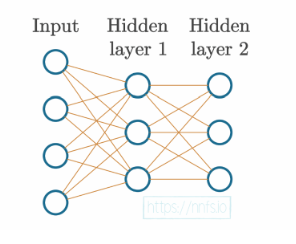

In [7]:
inputs = [[1, 2, 3, 2.5], [2., 5., -1., 2], [-1.5, 2.7, 3.3, -0.8]]
weights = [ 
            [0.2, 0.8, -0.5, 1],
            [0.5, -0.91, 0.26, -0.5],
            [-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]

weights2 = [[0.1, -0.14, 0.5],
            [-0.5, 0.12, -0.33],
            [-0.44, 0.73, -0.13]]
biases2 = [-1, 2, -0.5]

layer1_outputs = np.dot(inputs, np.array(weights).T) + biases
layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2

print(layer2_outputs)

[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


So far, we’ve only used what’s called a dense or
fully-connected layer. These layers are commonly referred to as “dense” layers in papers,
literature, and code, but you will occasionally see them called fully-connected.

In [ ]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

Activation functions 
* **Heaviside** (step function) - derivate is zero in all the domain, except for the point zero, where it is infinite (so no backpropagation). in many optimisation problems, we’d like a small change in the weight or bias to cause only a small corresponding change in the output from the network. By doing this, we can continuously tweaked the values of weights and bias towards resulting the best approximation. Having a function that can only generate either 0 or 1 (or yes and no), won't help us to achieve this objective.
* **Linear** - This activation function is usually applied to the last layer’s output in the case of a regression
model — a model that outputs a scalar value instead of a classification.
* **Sigmoid** - This function returns a value in the range of 0 for negative infinity, through 0.5 for the input of 0,
and to 1 for positive infinity. it’s usually better to have a more granular approach
for the hidden neuron activation functions. In this case, we’re getting a value that can be
reversed to its original value; the returned value contains all the information from the input,
contrary to a function like the step function, where an input of 3 will output the same value as an
input of 300,000. The output from the Sigmoid function, being in the range of 0 to 1, also works
better with neural networks
* **ReLu** - More computationally efficient to compute than Sigmoid like functions.  In practice, networks with Relu tend to show better convergence performance than sigmoid. Main problem is dying relu. Many variations exist RReLu, PReLu, ELU, SELU
* **Softmax** - distribution returned by the softmax activation function represents confidence scores for each
class and will add up to 1. The predicted class is associated with the output neuron that returned
the largest confidence score

In [ ]:
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
        
class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

Loss functions 
* Cross entropy -> $L_{i} = -log(\hat{y_{i,k}})$
where k is correct class and i is the instance order

In [ ]:
# Common loss class
class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss
    
# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
            range(samples),
            y_true
            ]

        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
            y_pred_clipped * y_true,
            axis=1
            )

        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

Backpropagation \
Lets say that we have 3 inputs [1 -2 3] and one neuron with ReLU activation function, also lets say our weights are [-3, -1 2] and bias is 1. Then we have: 
 
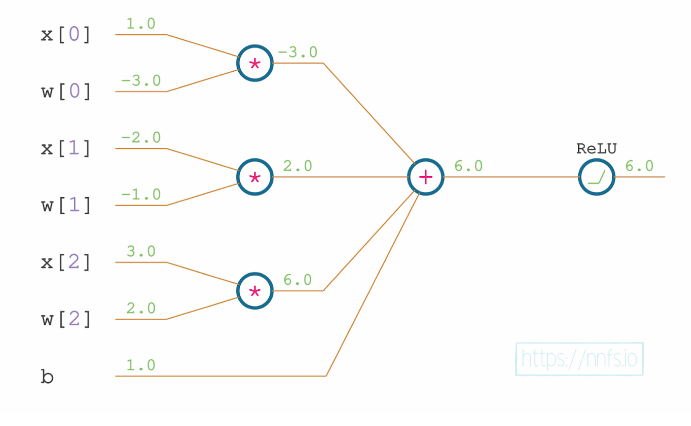

This is the full forward pass through a single neuron and a ReLU activation function. Let’s treat
all of these chained functions as one big function which takes input values (x), weights (w), and
bias (b), as inputs, and outputs y. This big function consists of multiple simpler functions — there
is a multiplication of input values and weights, sum of these values and bias, as well as a max
function as the ReLU activation — 3 chained functions in total.

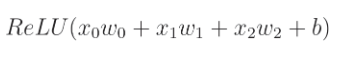

Our current task is to calculate how much each of the inputs, weights, and a bias impacts the
output.

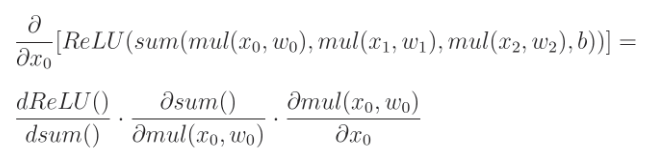

This equation shows that we have to calculate
the derivatives and partial derivatives of all of the atomic operations and multiply them to acquire
the impact that $x_{0}$ makes on the output. \
We’ll have multiple chained layers of neurons in the neural network model, followed by the loss
function. We want to know the impact of a given weight or bias on the loss. That means that we
will have to calculate the derivative of the loss function and
apply the chain rule with the derivatives of all activation functions and neurons in all of the
consecutive layers. The derivative with respect to the layer’s inputs, as opposed to the derivative
with respect to the weights and biases, is not used to update any parameters. Instead, it is used to
chain to another layer. \
For this example, let’s assume that our neuron receives a gradient of 1 from the next layer.

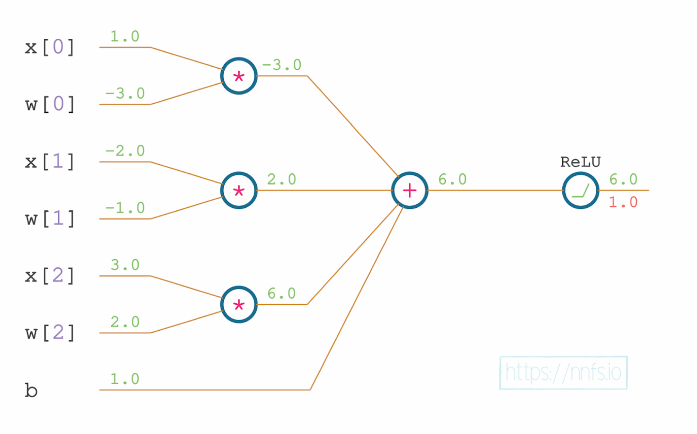

The input value to the ReLU function is 6, so the derivative equals 1. We have to use the chain
rule and multiply this derivative with the derivative received from the next layer, which is 1.

In [1]:
# Forward pass
x = [1.0, -2.0, 3.0] # input values
w = [-3.0, -1.0, 2.0] # weights
b = 1.0 # bias

xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]

z = xw0 + xw1 + xw2 + b
# ReLU activation function
y = max(z, 0)

# Backward pass
# The derivative from the next layer
dvalue = 1.0
# Derivative of ReLU and the chain rule
drelu_dz = dvalue * (1. if z > 0 else 0.)
print(drelu_dz)

1.0


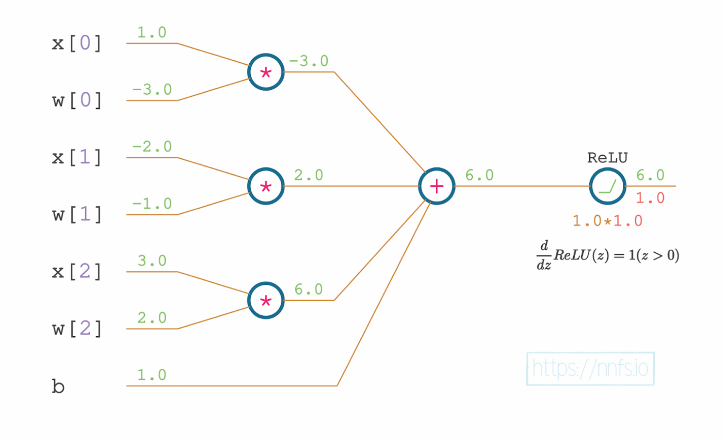

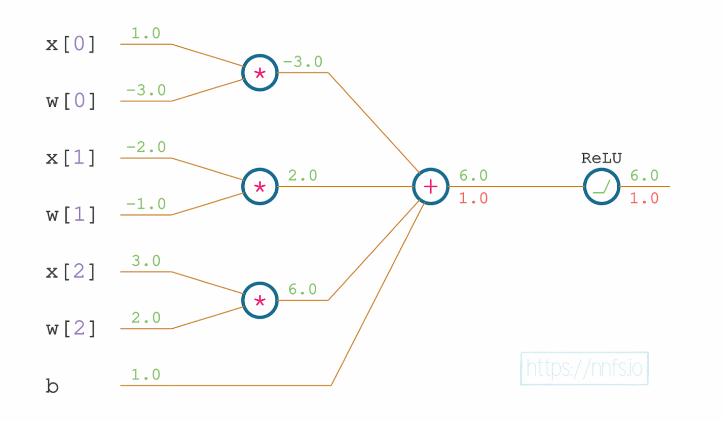

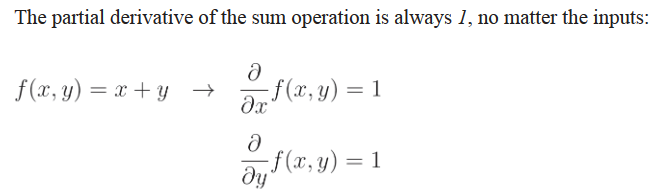

In [2]:
# Forward pass
x = [1.0, -2.0, 3.0] # input values
w = [-3.0, -1.0, 2.0] # weights
b = 1.0 # bias

xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]

z = xw0 + xw1 + xw2 + b
# ReLU activation function
y = max(z, 0)

# Backward pass
# The derivative from the next layer
dvalue = 1.0
# Derivative of ReLU and the chain rule
drelu_dz = dvalue * (1. if z > 0 else 0.)
print(drelu_dz)

# Partial derivatives of the multiplication, the chain rule
dsum_dxw0 = 1
drelu_dxw0 = drelu_dz * dsum_dxw0
print(drelu_dxw0)

1.0
1.0


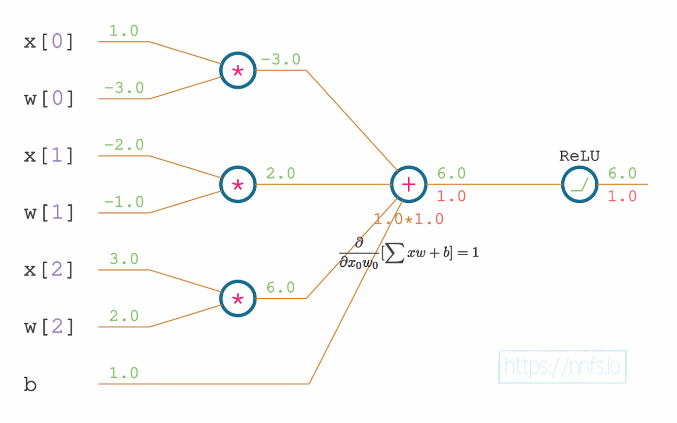

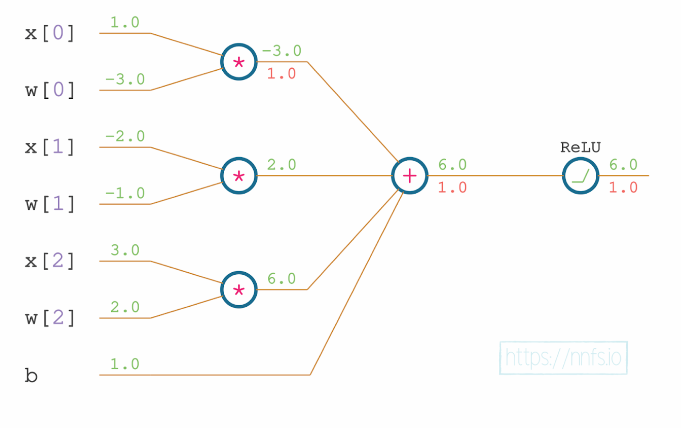

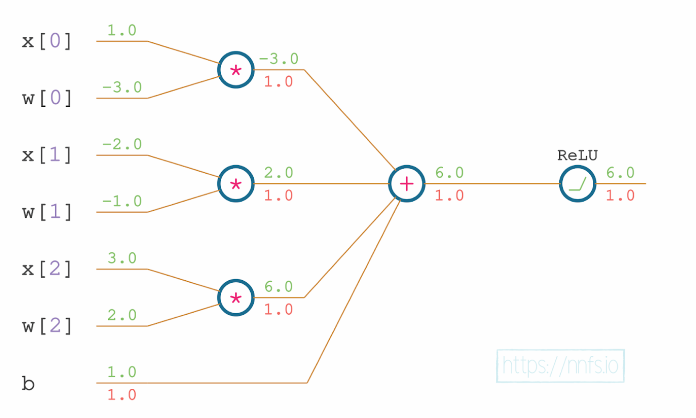

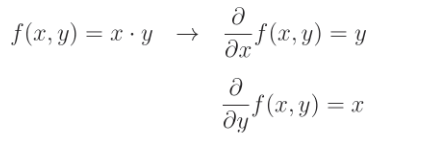

In [3]:
# Forward pass
x = [1.0, -2.0, 3.0] # input values
w = [-3.0, -1.0, 2.0] # weights
b = 1.0 # bias

xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]

z = xw0 + xw1 + xw2 + b
# ReLU activation function
y = max(z, 0)


# Backward pass
# The derivative from the next layer
dvalue = 1.0
# Derivative of ReLU and the chain rule
drelu_dz = dvalue * (1. if z > 0 else 0.)
print(drelu_dz)


# Partial derivatives of the multiplication, the chain rule
dsum_dxw0 = 1
dsum_dxw1 = 1
dsum_dxw2 = 1
dsum_db = 1
drelu_dxw0 = drelu_dz * dsum_dxw0
drelu_dxw1 = drelu_dz * dsum_dxw1
drelu_dxw2 = drelu_dz * dsum_dxw2
drelu_db = drelu_dz * dsum_db
print(drelu_dxw0, drelu_dxw1, drelu_dxw2, drelu_db)


# Partial derivatives of the multiplication, the chain rule
dmul_dx0 = w[0]
drelu_dx0 = drelu_dxw0 * dmul_dx0
print(drelu_dx0)

1.0
1.0 1.0 1.0 1.0
-3.0


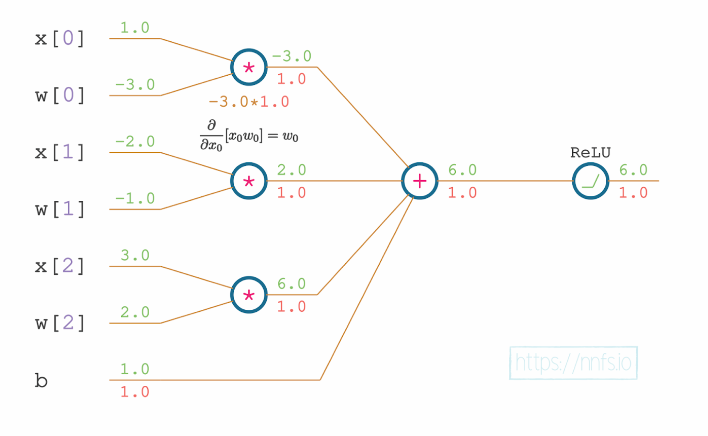

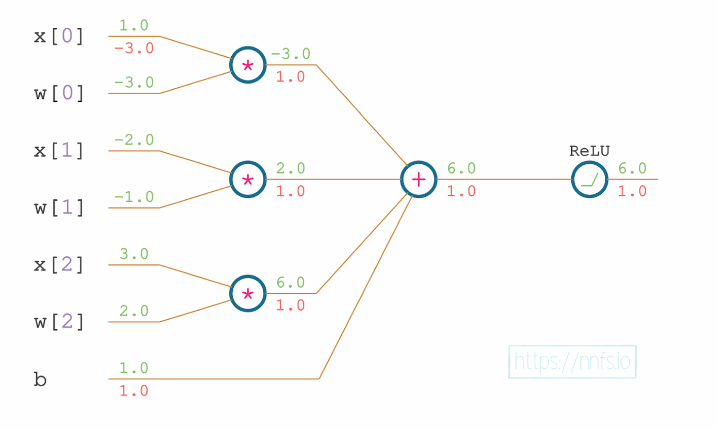

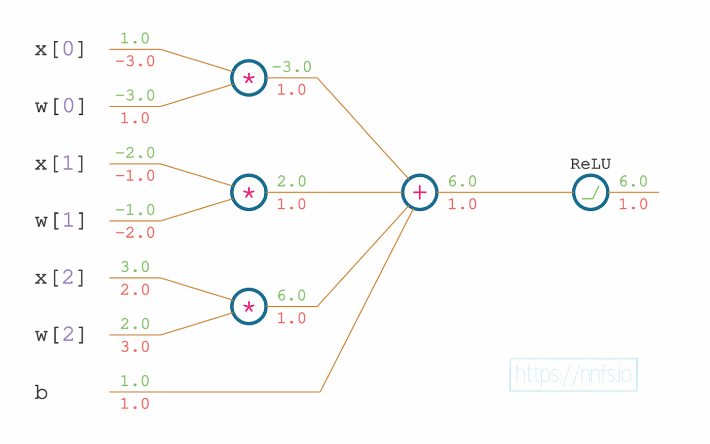

In [9]:
# our network will consist of a single hidden layer, containing 3 neurons (lists of 3 weight sets and 3 biases)
import numpy as np
# Passed in gradient from the next layer
dvalues = np.array([[1., 1., 1.]])

# We have 3 sets of weights - one set for each neuron
# we have 4 inputs, thus 4 weights
# recall that we keep weights transposed
weights = np.array([[0.2, 0.8, -0.5, 1],
                    [0.5, -0.91, 0.26, -0.5],
                    [-0.26, -0.27, 0.17, 0.87]]).T

# sum weights of given input
# and multiply by the passed in gradient for this neuron
dx0 = sum(weights[0]*dvalues[0])
dx1 = sum(weights[1]*dvalues[0])
dx2 = sum(weights[2]*dvalues[0])
dx3 = sum(weights[3]*dvalues[0])

dinputs = np.array([dx0, dx1, dx2, dx3])
print(dinputs)

dinputs = np.dot(dvalues[0], weights.T)
print(dinputs)

[ 0.44 -0.38 -0.07  1.37]
[ 0.44 -0.38 -0.07  1.37]


We have been using a
single sample responsible for a single gradient vector that is backpropagated between layers.
With more
samples, the layer will return a list of gradients

In [10]:
import numpy as np

# Passed in gradient from the next layer
dvalues = np.array([[1., 1., 1.],
                    [2., 2., 2.],
                    [3., 3., 3.]])

# We have 3 sets of weights - one set for each neuron
# we have 4 inputs, thus 4 weights
# recall that we keep weights transposed
weights = np.array([[0.2, 0.8, -0.5, 1],
                    [0.5, -0.91, 0.26, -0.5],
                    [-0.26, -0.27, 0.17, 0.87]]).T

# sum weights of given input
# and multiply by the passed in gradient for this neuron
dinputs = np.dot(dvalues, weights.T)
print(dinputs)

[[ 0.44 -0.38 -0.07  1.37]
 [ 0.88 -0.76 -0.14  2.74]
 [ 1.32 -1.14 -0.21  4.11]]


In [11]:
# Calculating the gradients with respect to weights is very similar
import numpy as np
# Passed in gradient from the next layer
# for the purpose of this example we're going to use
# an array of an incremental gradient values
dvalues = np.array([[1., 1., 1.],
                    [2., 2., 2.],
                    [3., 3., 3.]])

# We have 3 sets of inputs - samples
inputs = np.array([[1, 2, 3, 2.5],
                    [2., 5., -1., 2],
                    [-1.5, 2.7, 3.3, -0.8]])

# sum weights of given input
# and multiply by the passed in gradient for this neuron
dweights = np.dot(inputs.T, dvalues)
print(dweights)

[[ 0.5  0.5  0.5]
 [20.1 20.1 20.1]
 [10.9 10.9 10.9]
 [ 4.1  4.1  4.1]]


In [12]:
# For the biases and derivatives with respect to them, the derivatives come from the sum operation
# and always equal 1, multiplied by the incoming gradients to apply the chain rule.
import numpy as np
# Passed in gradient from the next layer
# for the purpose of this example we're going to use
# an array of an incremental gradient values
dvalues = np.array([[1., 1., 1.],
                    [2., 2., 2.],
                    [3., 3., 3.]])

# One bias for each neuron
# biases are the row vector with a shape (1, neurons)
biases = np.array([[2, 3, 0.5]])

# dbiases - sum values, do this over samples (first axis), keepdims
# since this by default will produce a plain list -
# we explained this in the chapter 4
dbiases = np.sum(dvalues, axis=0, keepdims=True)
print(dbiases)

[[6. 6. 6.]]


The last thing to cover here is the derivative of the ReLU function. It equals 1 if the input is
greater than 0 and 0 otherwise. The layer passes its outputs through the ReLU() activation during
the forward pass. For the backward pass, ReLU() receives a gradient of the same shape. The
derivative of the ReLU function will form an array of the same shape, filled with 1 when the
related input is greater than 0, and 0 otherwise.

In [15]:
import numpy as np
# Example layer output
z = np.array([[1, 2, -3, -4],
              [2, -7, -1, 3],
              [-1, 2, 5, -1]])

dvalues = np.array([[1, 2, 3, 4],
                    [5, 6, 7, 8],
                    [9, 10, 11, 12]])

# ReLU activation's derivative
drelu = np.zeros_like(z)
drelu[z > 0] = 1
print(drelu)

# The chain rule
drelu *= dvalues
print(drelu)

# shortcut
drelu = dvalues.copy()
drelu[z <= 0] = 0
print(drelu)

[[1 1 0 0]
 [1 0 0 1]
 [0 1 1 0]]
[[ 1  2  0  0]
 [ 5  0  0  8]
 [ 0 10 11  0]]
[[ 1  2  0  0]
 [ 5  0  0  8]
 [ 0 10 11  0]]


In [ ]:
class Layer_Dense:
    def __init__(self, inputs, neurons):
        self.weights = 0.01 * np.random.randn(inputs, neurons)
        self.biases = np.zeros((1, neurons))
    
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
        # added
        self.inputs = inputs
     
     # added   
    def backward(self, dvalues):
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        self.dinputs = np.dot(dvalues, self.weights.T)

class Activation_ReLU:
    def forward(self, inputs):
        # added
        self.inputs = inputs
        self.output = np.maximum(0, inputs)
        
    # added
    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0

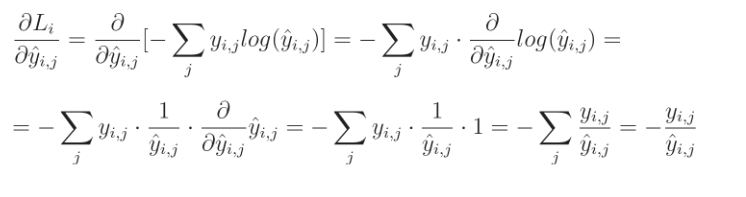

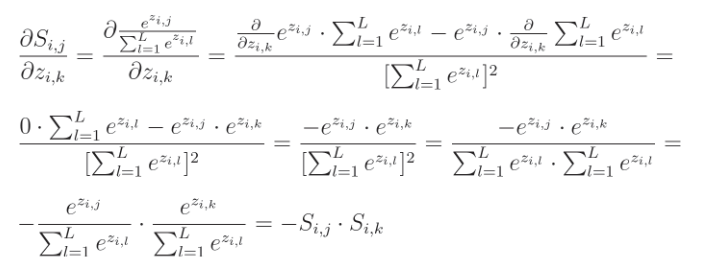

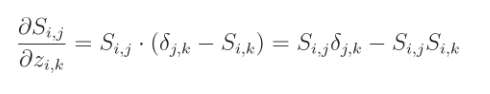

In [ ]:
# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
            range(samples),
            y_true
            ]

        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
            y_pred_clipped * y_true,
            axis=1
            )

        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        labels = len(dvalues[0])
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]
            
        self.dinputs = -y_true / dvalues
        self.dinputs = self.dinputs / samples

In [ ]:
class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

    def backward(self, dvalues):
        self.dinputs = np.empty_like(dvalues)
        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
            single_output = single_output.reshape(-1, 1)
            
            jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)
            
            self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)

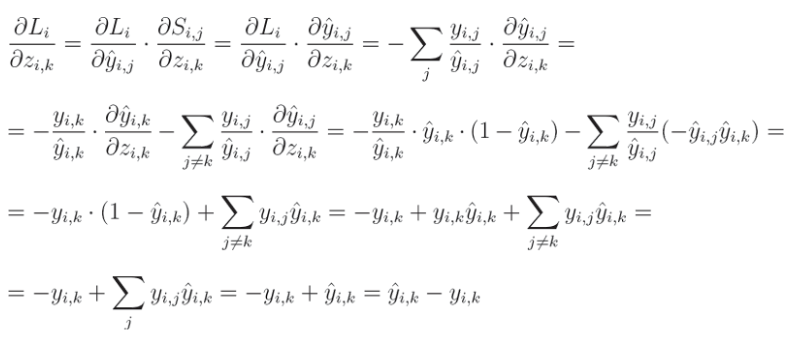

In [ ]:
class Activation_Softmax_Loss_CategoricalCrossentropy:
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()
    
    def forward(self, inputs, y_true):
        self.activation.forward(inputs)
        self.output = self.activation.output
        
        return self.loss.calculate(self.output, y_true)
        
    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
        
        self.dinputs = dvalues.copy()
        self.dinputs[range(samples), y_true] -= 1
        self.dinputs = self.dinputs / samples

Optimizers 
* Stochastic Gradient Descent, historically refers to an optimizer that fits a single
sample at a time. 
* The second optimizer, Batch Gradient Descent, is an optimizer used to fit a
whole dataset at once. 
* The last optimizer, Mini-batch Gradient Descent, is used to fit slices of a
dataset 

In the case of Stochastic Gradient Descent, we choose a learning rate, such as 1.0. We then
subtract the learning_rate · parameter_gradients from the actual parameter values.

In [2]:
class Optimizer_SGD:
    def __init__(self, learning_rate=1.0):
        self.learning_rate = learning_rate

    def update_params(self, layer):
        layer.weights += -self.learning_rate * layer.dweights
        layer.biases += -self.learning_rate * layer.dbiases
        
optimizer = Optimizer_SGD()

We want to perform small steps — calculating
the gradient, updating parameters by a negative fraction of this gradient, and repeating this in a
loop. Small steps ensure that we are following the direction of the steepest descent, but these steps
can also be too small, causing learning stagnation.

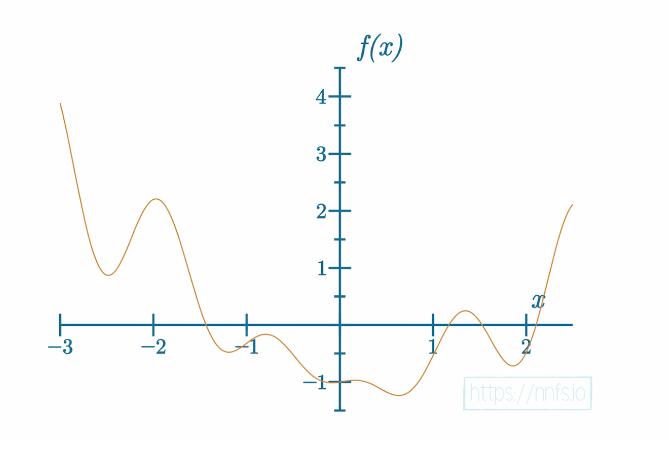

We can see the global minimum of this function, which is the lowest possible y value that this
function can output. This is the goal — to minimize the function’s output to find the global
minimum.

We’ll start descending from the left side of this graph. With an example learning rate:

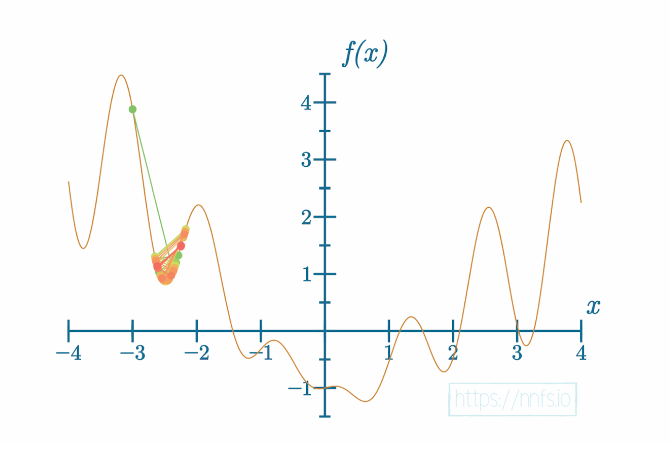

The learning rate turned out to be too small. Small updates to the parameters caused stagnation in
the model’s learning — the model got stuck in a local minimum. The local minimum is a
minimum that is near where we look but isn’t necessarily the global minimum, which is the
absolute lowest point for a function.

We can try to modify the learning rate:

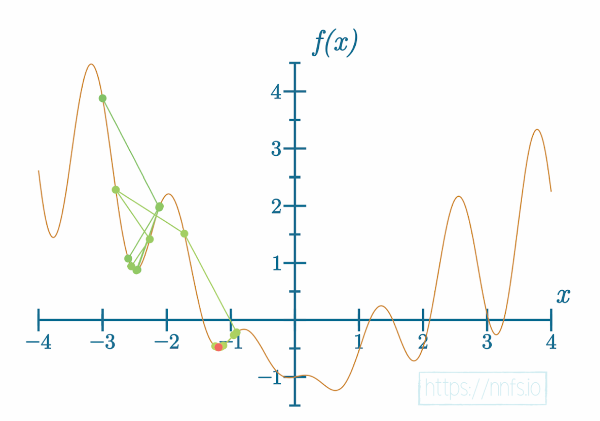

This time, the model escaped this local minimum but got stuck at another one. Let’s see one more
example after another learning rate change:

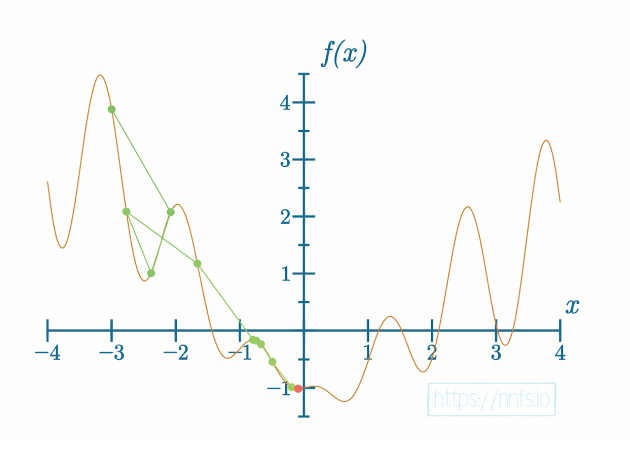

This time the model got stuck at a local minimum near the global minimum. The model was able
to escape the “deeper” local minimums, so it might be counter-intuitive why it is stuck here.
Remember, the model follows the direction of steepest descent of the loss function, no matter how
large or slight the descent is. For this reason, we’ll introduce **momentum** and the other techniques
to prevent such situations.

Momentum, in an optimizer, adds to the gradient what, in the physical world, we could call inertia
— for example, we can throw a ball uphill and, with a small enough hill or big enough applied
force, the ball can roll-over to the other side of the hill.

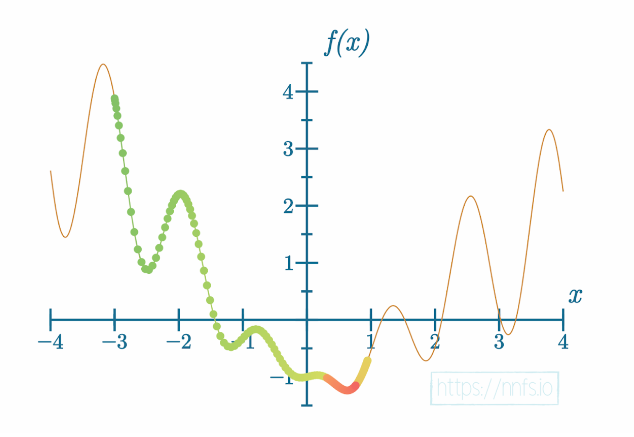

A commonly-used solution to keep initial updates large and explore various learning rates during
training is to implement a **learning rate decay**. \
The idea of a learning rate decay is to start with a large learning rate, say 1.0 in our case, and
then decrease it during training.



In [3]:
starting_learning_rate = 1.
learning_rate_decay = 0.1
step = 1
learning_rate = starting_learning_rate * (1. / (1 + learning_rate_decay * step))
print(learning_rate)

0.9090909090909091


In [4]:
starting_learning_rate = 1.
learning_rate_decay = 0.1
for step in range(20):
    learning_rate = starting_learning_rate * (1. / (1 + learning_rate_decay * step))
    print(learning_rate)

1.0
0.9090909090909091
0.8333333333333334
0.7692307692307692
0.7142857142857143
0.6666666666666666
0.625
0.588235294117647
0.5555555555555556
0.5263157894736842
0.5
0.47619047619047616
0.45454545454545453
0.4347826086956522
0.41666666666666663
0.4
0.3846153846153846
0.37037037037037035
0.35714285714285715
0.3448275862068965


In [ ]:
class Optimizer_SGD:   
    def __init__(self, learning_rate=1., decay=0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
    
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))
    
    def update_params(self, layer):
        layer.weights += -self.current_learning_rate * layer.dweights
        layer.biases += -self.current_learning_rate * layer.dbiases

    def post_update_params(self):
        self.iterations += 1

**Stochastic Gradient Descent with Momentum** \
Momentum creates a rolling average of gradients over some number of updates and uses this
average with the unique gradient at each step. Another way of understanding this is to imagine a
ball going down a hill — even if it finds a small hole or hill, momentum will let it go straight
through it towards a lower minimum — the bottom of this hill. This can help in cases where
you’re stuck in some local minimum (a hole), bouncing back and forth. With momentum, a model
is more likely to pass through local minimums, further decreasing loss. Simply put, momentum
may still point towards the global gradient descent direction.

We utilize momentum by setting a parameter between 0 and 1, representing the fraction of the
previous parameter update to retain, and subtracting (adding the negative) our actual gradient,
multiplied by the learning rate (like before), from it.

In [ ]:
class Optimizer_SGD:
    def __init__(self, learning_rate=1., decay=0., momentum=0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.momentum = momentum
        
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))

    def update_params(self, layer):
        if self.momentum:
            if not hasattr(layer, 'weight_momentums'):
                layer.weight_momentums = np.zeros_like(layer.weights)
                layer.bias_momentums = np.zeros_like(layer.biases)

            weight_updates = self.momentum * layer.weight_momentums - self.current_learning_rate * layer.dweights
            layer.weight_momentums = weight_updates
    
            bias_updates = self.momentum * layer.bias_momentums - self.current_learning_rate * layer.dbiases
            layer.bias_momentums = bias_updates
        else:
            weight_updates = -self.current_learning_rate * layer.dweights
            bias_updates = -self.current_learning_rate * layer.dbiases

        layer.weights += weight_updates
        layer.biases += bias_updates
    
    def post_update_params(self):
        self.iterations += 1

**AdaGrad**, short for adaptive gradient, institutes a per-parameter learning rate rather than a
globally-shared rate. The idea here is to normalize updates made to the features. During the
training process, some weights can rise significantly, while others tend to not change by much. It
is usually better for weights to not rise too high compared to the other weights.

AdaGrad provides a way to normalize parameter
updates by keeping a history of previous updates — the bigger the sum of the updates is, in either
direction (positive or negative), the smaller updates are made further in training. This lets
less-frequently updated parameters to keep-up with changes, effectively utilizing more neurons
for training.

**RMSProp**, short for Root Mean Square Propagation is similar to both momentum with the SGD optimizer and cache with the AdaGrad.
RMSProp adds a mechanism similar to momentum but also adds a per-parameter adaptive
learning rate, so the learning rate changes are smoother.

**Adam**, short for Adaptive Momentum, is currently the most widely-used optimizer and is built
atop RMSProp, with the momentum concept from SGD added back in. This means that, instead
of applying current gradients, we’re going to apply momentums like in the SGD optimizer with
momentum, then apply a per-weight adaptive learning rate with the cache as done in RMSProp. \
The Adam optimizer additionally adds a bias correction mechanism. The bias correction mechanism is applied to the cache and momentum, compensating
for the initial zeroed values before they warm up with initial steps. To achieve this correction,
both momentum and caches are divided by 1-beta^step. As step raises, beta^step approaches 0 (a
fraction to the power of a rising value decreases), solving this whole expression to a fraction
during the first steps and approaching 1 as training progresses.

In [ ]:
class Optimizer_Adam:
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7,
        beta_1=0.9, beta_2=0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2
    
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))
    
    def update_params(self, layer):
        if not hasattr(layer, 'weight_cache'):
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)
        
        layer.weight_momentums = self.beta_1 * layer.weight_momentums + (1 - self.beta_1) * layer.dweights
        layer.bias_momentums = self.beta_1 * layer.bias_momentums + (1 - self.beta_1) * layer.dbiases
        
        weight_momentums_corrected = layer.weight_momentums / (1 - self.beta_1 ** (self.iterations + 1))
        bias_momentums_corrected = layer.bias_momentums / (1 - self.beta_1 ** (self.iterations + 1))
        
        layer.weight_cache = self.beta_2 * layer.weight_cache + (1 - self.beta_2) * layer.dweights**2
        layer.bias_cache = self.beta_2 * layer.bias_cache + (1 - self.beta_2) * layer.dbiases**2

        weight_cache_corrected = layer.weight_cache / (1 - self.beta_2 ** (self.iterations + 1))
        bias_cache_corrected = layer.bias_cache / (1 - self.beta_2 ** (self.iterations + 1))
        
        layer.weights += -self.current_learning_rate * weight_momentums_corrected / (np.sqrt(weight_cache_corrected) + self.epsilon)
        layer.biases += -self.current_learning_rate * bias_momentums_corrected / (np.sqrt(bias_cache_corrected) + self.epsilon)
    
    def post_update_params(self):
        self.iterations += 1